In [86]:
using NamedTrajectories
using QuantumCollocation
using PGFPlotsX
using Colors
using LaTeXStrings

In [ ]:
data_path = "results/"

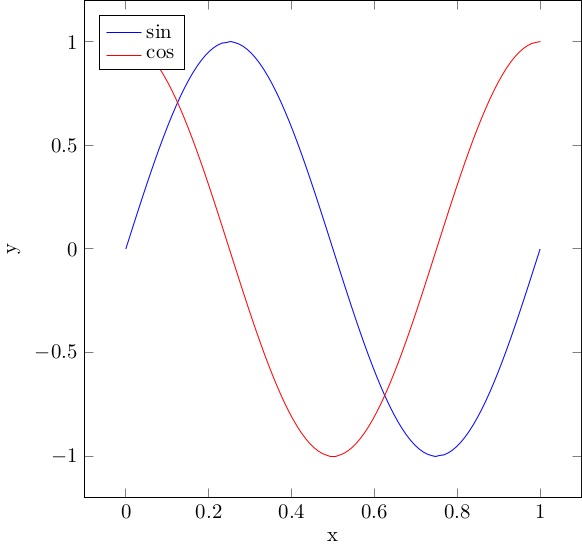

In [5]:
x = LinRange(0, 1, 100)
y = sin.(2π*x)
z = cos.(2π*x)

# plot the data
@pgf ax = Axis(
    {
        xlabel="x",
        ylabel="y",
        width="10cm",
        height="10cm",
        legend_pos="north west",
        legend_cell_align="left",
        legend_entries={
            "sin"=nothing,
            "cos"=nothing,
        },
    },
    Plot(
        {mark="none", color="blue"},
        Coordinates(x, y),
    ),
    Plot(
        {mark="none", color="red"},
        Coordinates(x, z),
    ),
) 

# show the plot
display("image/png", ax)

In [92]:
# function to plot matrix of data wher first row is independent variable
function plot_pgf(
    data::Matrix{<:Real}, 
    title::AbstractString,
    xlabel::AbstractString, 
    ylabel::AbstractString, 
    labels::Union{Nothing,Vector{<:AbstractString}}=nothing;
    height="7cm",
    width="10cm",
)
    x = data[1, :]
    plots = []
    colors = distinguishable_colors(
        size(data, 1)-1, 
        [RGB(1,1,1), RGB(0,0,0), RGB(1,0,0)], 
        dropseed=true
    )
    for (i, color) in zip(2:size(data, 1), colors)
        plot = @pgf Plot(
            {mark="none", color=color},
            Coordinates(x, data[i, :]),
        )
        push!(plots, plot)
    end
    @pgf ax = Axis(
        {
            title=title,
            xlabel=xlabel,
            ylabel=ylabel,
            width="10cm",
            height="10cm",
            legend_pos="north east",
            legend_cell_align="left",
            legend_entries=labels,
            height=height,
            width=width,
        },
        plots...,
        Legend()
    ) 
    return ax
end

plot_pgf (generic function with 7 methods)

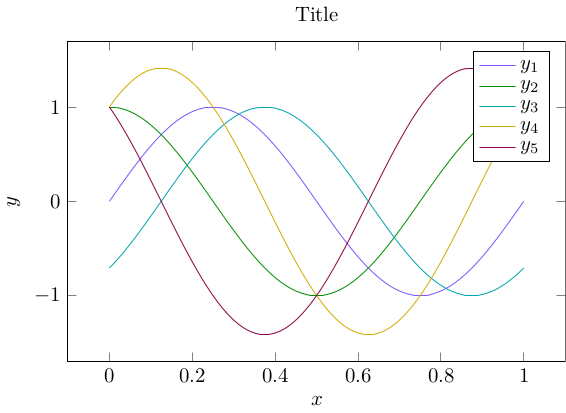

In [94]:
x = LinRange(0, 1, 100)
y1 = sin.(2π*x)
y2 = cos.(2π*x)
y3 = sin.(2π*x .- π/4)
y4 = cos.(2π*x) + sin.(2π*x)
y5 = cos.(2π*x) - sin.(2π*x)
data = hcat(x, y1, y2, y3, y4, y5)' |> collect
labels = collect([latexstring("y_$i") for i = 1:size(data, 1)-1])
ax = plot_pgf(data, "Title", L"x", L"y", labels)
display("image/png", ax)

In [110]:
function plot_states_and_controls(
    states::AbstractMatrix{<:Real},
    controls::AbstractMatrix{<:Real},
    times::AbstractVector{<:Real},
    ylabel_controls::AbstractString,
    ylabel_states::AbstractString,
    control_labels=collect([latexstring("u_$i") for i = 1:size(controls, 1)]),
    state_labels=collect([latexstring("x_$i") for i = 1:size(states, 1)]);
    height="7cm",
    width="10cm",
)
    times = collect(times)

    state_colors = distinguishable_colors(
        size(states, 1), 
        [RGB(1,1,1), RGB(0,0,0), RGB(1,0,0)], 
        dropseed=true
    )

    state_plots = []

    for (i, color) in zip(1:size(states, 1), state_colors)
        plot = @pgf Plot(
            {mark="none", color=color},
            Coordinates(times, states[:, i]),
        )
        push!(state_plots, plot)
    end

    control_colors = distinguishable_colors(
        size(controls, 1), 
        [RGB(1,1,1), RGB(0,0,0), RGB(1,0,0)], 
        dropseed=true
    )

    control_plots = []

    for (i, color) in zip(1:size(controls, 1), control_colors)
        plot = @pgf Plot(
            {mark="none", color=color},
            Coordinates(times, controls[:, i]),
        )
        push!(control_plots, plot)
    end

    @pgf gp = GroupPlot(
        2, 1,
        {
            group_style={
                group_size={width=width, height=height},
                horizontal_sep=0.1cm,
                vertical_sep=0.1cm,
            },
            height=height,
            width=width,
        },
        Axis(
            {
                title="States",
                xlabel=L"t",
                ylabel=ylabel_states,
                width="10cm",
                height="10cm",
                legend_pos="north east",
                legend_cell_align="left",
                legend_entries=state_labels,
            },
            state_plots...,
            Legend()
        ),
        Axis(
            {
                title="Controls",
                xlabel=L"t",
                ylabel=ylabel_controls,
                width="10cm",
                height="10cm",
                legend_pos="north east",
                legend_cell_align="left",
                legend_entries=control_labels,
            },
            control_plots...,
            Legend()
        ),
    )
    return gp
end

plot_states_and_controls (generic function with 14 methods)

In [111]:
t = LinRange(0, 1, 100)
x1 = sin.(2π*t)
x2 = cos.(2π*t)
u1 = sin.(2π*t .- π/4)
u2 = cos.(2π*t) + sin.(2π*t)

gp = plot_states_and_controls(
    hcat(x1, x2)', 
    hcat(u1, u2)', 
    t, 
    L"u", 
    L"x", 
    collect([latexstring("u_$i") for i = 1:2]),
    collect([latexstring("x_$i") for i = 1:2]),
)

DimensionMismatch: DimensionMismatch: arrays could not be broadcast to a common size; got a dimension with lengths 100 and 2